# Building models to predict whether a kickstarter will succeed, be suspended, live, canceled or fail

Sources of data used:
- https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Data Cleaning

In [2]:
df_18 = pd.read_csv("2018.csv", index_col=0)
df_18.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df_16 = pd.read_csv("2016.csv", index_col=0, encoding='cp1252')
df_16.head()

/home/ubuntu/ai/kick/assets/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


## Drop NaN columns and rows

In [4]:
print("Rows before dropping NaN: ", len(df_18))
df_18 = df_18.dropna()
print("Rows after dropping NaN: ", len(df_18))

Rows before dropping NaN:  378661
Rows after dropping NaN:  374860


In [5]:
df_16 = df_16.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], errors="ignore")
print("Rows before dropping NaN: ", len(df_16))
df_16 = df_16.dropna()
print("Rows after dropping NaN: ", len(df_16))

Rows before dropping NaN:  323750
Rows after dropping NaN:  319951


## Clean the currency column

In [6]:
df_16.columns = map(lambda x: x.strip(), df_16.columns)
df_16.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged'],
      dtype='object')

In [7]:
print(df_16.currency.unique())
print(df_18.currency.unique())

['GBP' 'USD' 'CAD' 'NOK' 'AUD' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'Music' 'Food' 'Theater' 'Technology' 'Film & Video' 'SGD' 'Games' 'Art'
 'Publishing' 'Design' 'Rock' 'Comics' 'Crafts' 'Photography' 'Journalism'
 'Fashion' 'Software' 'Dance' ' Be active!' 'Nonfiction'
 ' clothing company' 'Painting' ' tango and culture' ' Religion '
 'Apparel']
['GBP' 'USD' 'CAD' 'AUD' 'NOK' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'SGD' 'JPY']


In [8]:
df_16 = df_16[(df_16.currency.str.len() == 3) & (df_16.currency.str.isupper())]

In [9]:
df_18.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
df_16.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
ID,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [11]:
df = df_16.merge(df_18, how="outer", left_index=True, right_index=True)
print("Length of 2018 data: ", len(df_18))
print("Length of merged data: ", len(df))

Length of 2018 data:  374860
Length of merged data:  374860


Since, the length of the data in the 2018 dataframe and the dataframe containing the outer join of the 2018 and 2016 data seems to be the same, the 2018 dataframe contains all the data (which is also updated) present in the 2016 dataframe and more. Because of this we'll be working only with the 2018 dataframe.

## Drop columns that are not useful

- *name* is dropped as that's not a factor in whether or not the kickstarter will succeed.
- *currency*, *goal* and *pledged* is dropped as the value of these two columns in encoded in a standardized form of USD in the *usd_goal_real* and *usd_pledged_real* columns respectively.
- *usd pledged* is the column which contains the pledged amount converted to USD by kickstarter. However, after analyzing the column, this seems more innaccurate than *usd_pledged_real* column which also shows the amount pledged in USD, but, the conversion is done using [fixr.io](https://fixr.io)

In [12]:
df = df_18.copy()

columns_to_drop = ["name", "currency", "goal", "pledged", "usd pledged"]
df = df.drop(columns=columns_to_drop, errors="ignore")


df.head()

,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
ID,,,,,,,,,
1000002330,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1000003930,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
1000004038,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
1000007540,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
1000011046,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


## Prevent data leakage

All the records present in the dataframe contain a launched date. However, for most real world use cases, the product may not have been launched yet and this information would not be available. If we train a model which takes this data into consideration, it would fail as this data would not actually be available, hence creating a data leakage. To prevent this we'll be dropping the *launched* column.

In [13]:
df = df.drop(columns=["launched"], errors="ignore")
df.head()

,category,main_category,deadline,state,backers,country,usd_pledged_real,usd_goal_real
ID,,,,,,,,
1000002330,Poetry,Publishing,2015-10-09,failed,0,GB,0.0,1533.95
1000003930,Narrative Film,Film & Video,2017-11-01,failed,15,US,2421.0,30000.00
1000004038,Narrative Film,Film & Video,2013-02-26,failed,3,US,220.0,45000.00
1000007540,Music,Music,2012-04-16,failed,1,US,1.0,5000.00
1000011046,Film & Video,Film & Video,2015-08-29,canceled,14,US,1283.0,19500.00


## Rename columns to make it easier

In [14]:
df = df.rename(columns={"main_category": "category", "category": "subcategory", "usd_pledged_real": "pledged", "usd_goal_real": "goal"})

In [15]:
# df["deadline"] = pd.to_datetime(df.deadline)
# df["launched"] = pd.to_datetime(df.launched)
# df["difference"] = (df.launched - df.deadline).dt.days
# df = df.drop(columns=["launched", "deadline"], errors="ignore")
# df.head()

# Data Exploration

In [16]:
# Different kinds of states
df.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

Some plots that I thought might be useful to understand relationships or get some interesting insights that may or may not be useful (but interesting nonetheless)
- Bar chart of frequency of main_category
- Bar chart of success rate of each main category
- Box plots for no. of backers for each kind of *state*
- Box plots for no. of backers for each kind of category

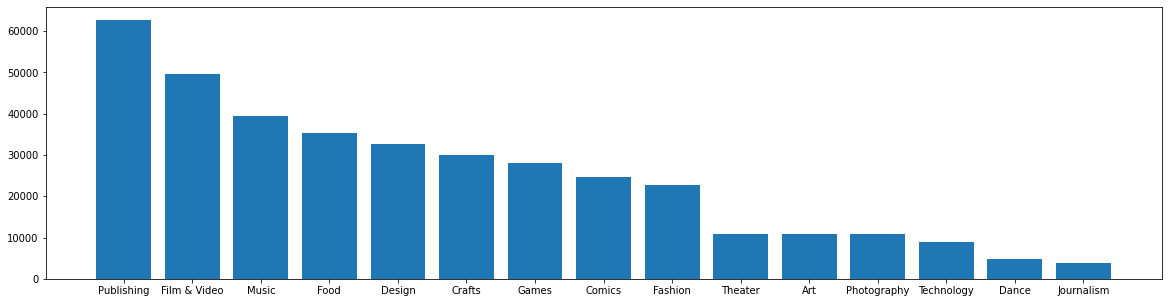

In [17]:
plt.figure(figsize=(20,5))
plt.bar(list(df.category.unique()),list(df.category.value_counts()))
plt.show()

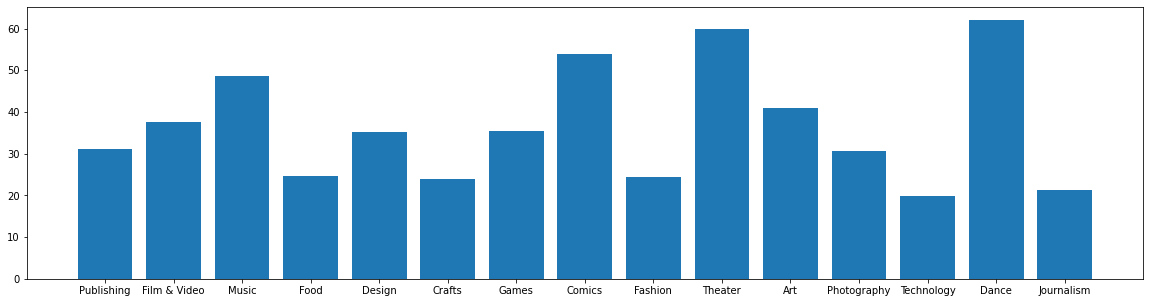

In [18]:
categories = list(df.category.unique())
success_rates = []
for category in categories:
    success_series = df[(df.state == "successful") & (df.category == category)]
    category_series = df[df.category == category]
    success_rates.append(round(len(success_series) * 100 / len(category_series), 2))

plt.figure(figsize=(20,5))
plt.bar(categories, success_rates)
plt.show()

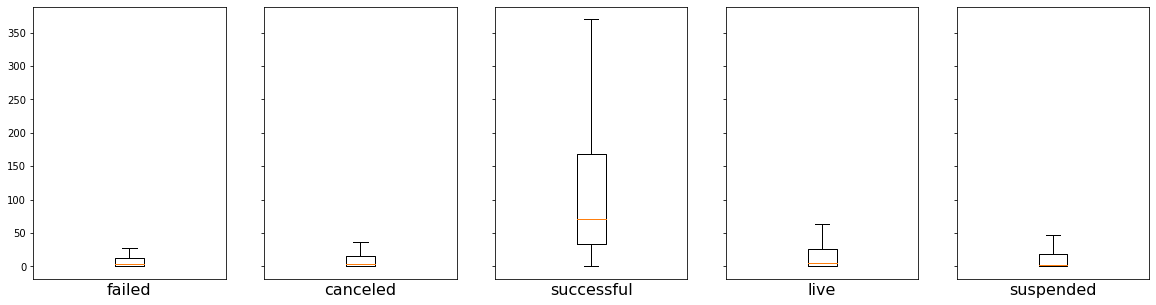

In [19]:
states = list(df.state.unique())
fig, axes = plt.subplots(1, len(states), sharey=True, figsize=(20,5))
for index, state in enumerate(states):
    x = df[df.state == state]
    axes[index].boxplot(x.backers, showfliers=False)
    axes[index].set_xticks([])
    axes[index].set_xlabel(state, fontsize=16)

plt.show()

From the above boxplot, we can see that the number of backers on successfull project is almost always more than the other states.

# Categorizing, One Hot Encoding and Splitting data

## Categorize the data

In [20]:
for item in df.state.value_counts().items():
    print(f'{item[0]}: {round(item[1]*100/len(df), 2)}% ({item[1]} items)')
len(df)

failed: 52.72% (197611 items)
successful: 35.71% (133851 items)
canceled: 10.34% (38757 items)
live: 0.75% (2798 items)
suspended: 0.49% (1843 items)


374860

In [21]:
def categorize(df, column):
    categories = df[column].unique()
    encoded = { y: x for x, y in enumerate(list(categories)) }
    df[column] = df[column].replace(encoded)
    return (encoded, df)

In [22]:
categorical_keys = {}

columns_to_encode = ["category", "subcategory", "country", "state"]
df2 = df.copy()
for column in columns_to_encode:
    key, df2 = categorize(df2.copy(), column)
    categorical_keys[column] = key

In [23]:
categorical_keys

{'category': {'Publishing': 0,
  'Film & Video': 1,
  'Music': 2,
  'Food': 3,
  'Design': 4,
  'Crafts': 5,
  'Games': 6,
  'Comics': 7,
  'Fashion': 8,
  'Theater': 9,
  'Art': 10,
  'Photography': 11,
  'Technology': 12,
  'Dance': 13,
  'Journalism': 14},
 'subcategory': {'Poetry': 0,
  'Narrative Film': 1,
  'Music': 2,
  'Film & Video': 3,
  'Restaurants': 4,
  'Food': 5,
  'Drinks': 6,
  'Product Design': 7,
  'Documentary': 8,
  'Nonfiction': 9,
  'Indie Rock': 10,
  'Crafts': 11,
  'Games': 12,
  'Tabletop Games': 13,
  'Design': 14,
  'Comic Books': 15,
  'Art Books': 16,
  'Fashion': 17,
  'Childrenswear': 18,
  'Theater': 19,
  'Comics': 20,
  'DIY': 21,
  'Webseries': 22,
  'Animation': 23,
  'Food Trucks': 24,
  'Public Art': 25,
  'Illustration': 26,
  'Photography': 27,
  'Pop': 28,
  'People': 29,
  'Art': 30,
  'Family': 31,
  'Fiction': 32,
  'Accessories': 33,
  'Rock': 34,
  'Hardware': 35,
  'Software': 36,
  'Weaving': 37,
  'Gadgets': 38,
  'Web': 39,
  'Jazz': 

In [24]:
df2.head()

,subcategory,category,deadline,state,backers,country,pledged,goal
ID,,,,,,,,
1000002330,0,0,2015-10-09,0,0,0,0.0,1533.95
1000003930,1,1,2017-11-01,0,15,1,2421.0,30000.00
1000004038,1,1,2013-02-26,0,3,1,220.0,45000.00
1000007540,2,2,2012-04-16,0,1,1,1.0,5000.00
1000011046,3,1,2015-08-29,1,14,1,1283.0,19500.00


## Split the data

In [25]:
X_cols = ["category", "subcategory", "backers", "country", "pledged", "goal"]
y_col = "state"

X = df2[X_cols]
y = df2[y_col]

In [26]:
X.head()

,category,subcategory,backers,country,pledged,goal
ID,,,,,,
1000002330,0,0,0,0,0.0,1533.95
1000003930,1,1,15,1,2421.0,30000.00
1000004038,1,1,3,1,220.0,45000.00
1000007540,2,2,1,1,1.0,5000.00
1000011046,1,3,14,1,1283.0,19500.00


In [27]:
y.head()

ID
1000002330    0
1000003930    0
1000004038    0
1000007540    0
1000011046    1
Name: state, dtype: int64

## One hot encoding

In [28]:
one_hot_keys = {}

def one_hot_encode(df, column, label):
    columns = {f'{label}_{x}': int(x) for x in df[column].unique()}
    for key, value in columns.items():
        df[key] = df[column] == value
        df[key] = df[key].astype(int)
    
    df = df.drop(columns=[column])
    return (columns, df)

X_to_encode = ["category", "subcategory", "country"]

X2 = X.copy()
for col in X_to_encode:
    key, X2 = one_hot_encode(X2, col, col)
    one_hot_keys[col] = key
    
one_hot_columns = list(X2.columns)

In [29]:
one_hot_keys

{'category': {'category_0': 0,
  'category_1': 1,
  'category_2': 2,
  'category_3': 3,
  'category_4': 4,
  'category_5': 5,
  'category_6': 6,
  'category_7': 7,
  'category_8': 8,
  'category_9': 9,
  'category_10': 10,
  'category_11': 11,
  'category_12': 12,
  'category_13': 13,
  'category_14': 14},
 'subcategory': {'subcategory_0': 0,
  'subcategory_1': 1,
  'subcategory_2': 2,
  'subcategory_3': 3,
  'subcategory_4': 4,
  'subcategory_5': 5,
  'subcategory_6': 6,
  'subcategory_7': 7,
  'subcategory_8': 8,
  'subcategory_9': 9,
  'subcategory_10': 10,
  'subcategory_11': 11,
  'subcategory_12': 12,
  'subcategory_13': 13,
  'subcategory_14': 14,
  'subcategory_15': 15,
  'subcategory_16': 16,
  'subcategory_17': 17,
  'subcategory_18': 18,
  'subcategory_19': 19,
  'subcategory_20': 20,
  'subcategory_21': 21,
  'subcategory_22': 22,
  'subcategory_23': 23,
  'subcategory_24': 24,
  'subcategory_25': 25,
  'subcategory_26': 26,
  'subcategory_27': 27,
  'subcategory_28': 28,
 

In [30]:
X2.head()

,backers,pledged,goal,category_0,category_1,category_2,category_3,category_4,category_5,category_6,...,country_12,country_13,country_14,country_15,country_16,country_17,country_18,country_19,country_20,country_21
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0,0.0,1533.95,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003930,15,2421.0,30000.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004038,3,220.0,45000.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000007540,1,1.0,5000.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000011046,14,1283.0,19500.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Store the keys in a json file to access in node backend

In [37]:
categorical_file = open("categorical_keys.json", "w")
json.dump(categorical_keys, categorical_file, indent=2)

one_hot_file = open("one_hot_keys.json", "w")
json.dump(one_hot_keys, one_hot_file, indent=2)

columns_file = open("columns.json", "w")
json.dump(one_hot_columns, columns_file, indent=2)

# Normalizing the data and Building the model

In [61]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Split train and validation data

In [39]:
X2 = X2
y2 = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X2, y2)

## Scale and Normalize the data

In [40]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [41]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [42]:
print("columns (no. of features): ", len(X_test_s[0]))
print("rows in training: ", len(X_train_s))
print("rows in test: ", len(X_test_s))
print(y_train)
print(y_test)

columns (no. of features):  199
rows in training:  281145
rows in test:  93715
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


## Compile, train and save the model

In [47]:
model = Sequential()
model.add(Dense(20, input_dim=(len(X_train_s[0])) , activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(5, activation="softmax"))
optimizer = Adam(lr=0.3)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
model.fit(X_train_s, y_train, batch_size=20000, epochs=1500, validation_data=(X_test_s, y_test))

Epoch 1/500
15/15 [==============================] - 0s 32ms/step - loss: 0.4173 - accuracy: 0.8613 - val_loss: 0.4381 - val_accuracy: 0.8566
Epoch 2/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4214 - accuracy: 0.8600 - val_loss: 0.4414 - val_accuracy: 0.8562
Epoch 3/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4210 - accuracy: 0.8601 - val_loss: 0.4429 - val_accuracy: 0.8559
Epoch 4/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4226 - accuracy: 0.8599 - val_loss: 0.4370 - val_accuracy: 0.8575
Epoch 5/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4213 - accuracy: 0.8598 - val_loss: 0.4399 - val_accuracy: 0.8574
Epoch 6/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4218 - accuracy: 0.8600 - val_loss: 0.4377 - val_accuracy: 0.8578
Epoch 7/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4204 - accuracy: 0.8607 - val_loss: 0.4363 - val_accuracy: 0.8590
Epoch 

15/15 [==============================] - 0s 21ms/step - loss: 0.4187 - accuracy: 0.8605 - val_loss: 0.4425 - val_accuracy: 0.8561
Epoch 59/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4223 - accuracy: 0.8594 - val_loss: 0.4350 - val_accuracy: 0.8590
Epoch 60/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4185 - accuracy: 0.8609 - val_loss: 0.4364 - val_accuracy: 0.8590
Epoch 61/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4167 - accuracy: 0.8617 - val_loss: 0.4376 - val_accuracy: 0.8578
Epoch 62/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4187 - accuracy: 0.8604 - val_loss: 0.4363 - val_accuracy: 0.8583
Epoch 63/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4172 - accuracy: 0.8612 - val_loss: 0.4390 - val_accuracy: 0.8553
Epoch 64/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4217 - accuracy: 0.8595 - val_loss: 0.4370 - val_accuracy: 0.8576
Epoch 65/500

15/15 [==============================] - 0s 21ms/step - loss: 0.4212 - accuracy: 0.8603 - val_loss: 0.4366 - val_accuracy: 0.8583
Epoch 116/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4221 - accuracy: 0.8609 - val_loss: 0.4400 - val_accuracy: 0.8580
Epoch 117/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4182 - accuracy: 0.8614 - val_loss: 0.4324 - val_accuracy: 0.8594
Epoch 118/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4171 - accuracy: 0.8618 - val_loss: 0.4371 - val_accuracy: 0.8579
Epoch 119/500
15/15 [==============================] - 0s 22ms/step - loss: 0.4174 - accuracy: 0.8617 - val_loss: 0.4360 - val_accuracy: 0.8585
Epoch 120/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4193 - accuracy: 0.8612 - val_loss: 0.4353 - val_accuracy: 0.8580
Epoch 121/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4189 - accuracy: 0.8611 - val_loss: 0.4354 - val_accuracy: 0.8589
Epoch 

Epoch 172/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4176 - accuracy: 0.8616 - val_loss: 0.4367 - val_accuracy: 0.8577
Epoch 173/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4174 - accuracy: 0.8610 - val_loss: 0.4330 - val_accuracy: 0.8596
Epoch 174/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4156 - accuracy: 0.8619 - val_loss: 0.4294 - val_accuracy: 0.8608
Epoch 175/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4118 - accuracy: 0.8635 - val_loss: 0.4368 - val_accuracy: 0.8571
Epoch 176/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4156 - accuracy: 0.8615 - val_loss: 0.4322 - val_accuracy: 0.8591
Epoch 177/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4182 - accuracy: 0.8614 - val_loss: 0.4375 - val_accuracy: 0.8574
Epoch 178/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4171 - accuracy: 0.8615 - val_loss: 0.4346 - val_accuracy:

Epoch 229/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4126 - accuracy: 0.8630 - val_loss: 0.4316 - val_accuracy: 0.8609
Epoch 230/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4120 - accuracy: 0.8633 - val_loss: 0.4315 - val_accuracy: 0.8591
Epoch 231/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4129 - accuracy: 0.8627 - val_loss: 0.4330 - val_accuracy: 0.8594
Epoch 232/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4132 - accuracy: 0.8625 - val_loss: 0.4361 - val_accuracy: 0.8583
Epoch 233/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4172 - accuracy: 0.8610 - val_loss: 0.4334 - val_accuracy: 0.8601
Epoch 234/500
15/15 [==============================] - 0s 18ms/step - loss: 0.4183 - accuracy: 0.8610 - val_loss: 0.4405 - val_accuracy: 0.8570
Epoch 235/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4180 - accuracy: 0.8612 - val_loss: 0.4306 - val_accuracy:

Epoch 286/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4167 - accuracy: 0.8614 - val_loss: 0.4311 - val_accuracy: 0.8612
Epoch 287/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4138 - accuracy: 0.8627 - val_loss: 0.4334 - val_accuracy: 0.8604
Epoch 288/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4120 - accuracy: 0.8627 - val_loss: 0.4277 - val_accuracy: 0.8623
Epoch 289/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4126 - accuracy: 0.8628 - val_loss: 0.4345 - val_accuracy: 0.8579
Epoch 290/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4129 - accuracy: 0.8617 - val_loss: 0.4304 - val_accuracy: 0.8605
Epoch 291/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4124 - accuracy: 0.8631 - val_loss: 0.4307 - val_accuracy: 0.8595
Epoch 292/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4105 - accuracy: 0.8635 - val_loss: 0.4335 - val_accuracy:

Epoch 343/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4163 - accuracy: 0.8619 - val_loss: 0.4292 - val_accuracy: 0.8604
Epoch 344/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4117 - accuracy: 0.8630 - val_loss: 0.4291 - val_accuracy: 0.8617
Epoch 345/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4114 - accuracy: 0.8637 - val_loss: 0.4290 - val_accuracy: 0.8608
Epoch 346/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4102 - accuracy: 0.8634 - val_loss: 0.4289 - val_accuracy: 0.8611
Epoch 347/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4118 - accuracy: 0.8633 - val_loss: 0.4292 - val_accuracy: 0.8608
Epoch 348/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4106 - accuracy: 0.8633 - val_loss: 0.4334 - val_accuracy: 0.8590
Epoch 349/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4122 - accuracy: 0.8629 - val_loss: 0.4321 - val_accuracy:

Epoch 400/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4198 - accuracy: 0.8618 - val_loss: 0.4297 - val_accuracy: 0.8609
Epoch 401/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4134 - accuracy: 0.8630 - val_loss: 0.4355 - val_accuracy: 0.8581
Epoch 402/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4162 - accuracy: 0.8621 - val_loss: 0.4309 - val_accuracy: 0.8602
Epoch 403/500
15/15 [==============================] - 0s 21ms/step - loss: 0.4131 - accuracy: 0.8629 - val_loss: 0.4320 - val_accuracy: 0.8601
Epoch 404/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4117 - accuracy: 0.8632 - val_loss: 0.4327 - val_accuracy: 0.8603
Epoch 405/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4096 - accuracy: 0.8642 - val_loss: 0.4245 - val_accuracy: 0.8625
Epoch 406/500
15/15 [==============================] - 0s 18ms/step - loss: 0.4074 - accuracy: 0.8648 - val_loss: 0.4259 - val_accuracy:

Epoch 457/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4124 - accuracy: 0.8629 - val_loss: 0.4290 - val_accuracy: 0.8614
Epoch 458/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4118 - accuracy: 0.8629 - val_loss: 0.4274 - val_accuracy: 0.8614
Epoch 459/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4108 - accuracy: 0.8634 - val_loss: 0.4279 - val_accuracy: 0.8620
Epoch 460/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4107 - accuracy: 0.8636 - val_loss: 0.4324 - val_accuracy: 0.8597
Epoch 461/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4115 - accuracy: 0.8628 - val_loss: 0.4303 - val_accuracy: 0.8606
Epoch 462/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4096 - accuracy: 0.8639 - val_loss: 0.4330 - val_accuracy: 0.8606
Epoch 463/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4184 - accuracy: 0.8628 - val_loss: 0.4339 - val_accuracy:

In [50]:
save_model(model, "./model")

INFO:tensorflow:Assets written to: ./model/assets


## Evaluate the model

In [59]:
test_predictions = model.predict(X_test_s)
test_predictions = [row.argmax() for row in test_predictions]
y_test_categorical = [row.argmax() for row in y_test]

In [80]:
accuracy_score(y_test_categorical, test_predictions)

0.8600650909672944

In [70]:
confusion_matrix(y_test_categorical, test_predictions)

array([[47822,    57,  1334,     2,     2],
       [ 9315,    61,   328,     0,     0],
       [  910,     2, 32717,     0,     1],
       [  545,     1,   157,     1,     0],
       [  376,     0,    84,     0,     0]])

In [77]:
recall_score(y_test_categorical, test_predictions, average="micro")

0.8600650909672944

In [78]:
f1_score(y_test_categorical, test_predictions, average="micro")

0.8600650909672944

In [79]:
precision_score(y_test_categorical, test_predictions, average="micro")

0.8600650909672944